In [1]:
# -*- coding: utf-8 -*-
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import json
from glob import glob
import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

from models import Densenet
from efficientnet_pytorch import EfficientNet


first_model = '{2}_loss.pth'
second_model = '{17}_loss{1.6857}.pth'
third_model = 'efficientnet_b3.pt'


In [2]:
seed = 5487
device = 'cuda:0'
if not torch.cuda.is_available(): device='cpu'
load_model_path = './{17}_loss{1.6857}.pth'
torch.manual_seed(seed)
np.random.seed(seed)

with open('./word2label.json', 'r', encoding='utf-8') as f:
    word2label = json.load(f)
label2word = {val:key for key, val in word2label.items()}

label2word2 = dict()
with open('./idx2class.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for idx, l in enumerate(lines):
        label2word2[idx] = l.strip()

model1 = Densenet(len(word2label)).to(device)
model1.load_state_dict(torch.load(first_model, map_location=torch.device('cpu')))
model1.eval()       

model2 = Densenet(len(word2label)).to(device)
model2.load_state_dict(torch.load(second_model, map_location=torch.device('cpu'))['net'])
model2.eval()

model3 = EfficientNet.from_name('efficientnet-b3')
model3._fc = nn.Linear(1536, 800)
model3.load_state_dict(torch.load(third_model, map_location=torch.device('cpu')))
model3.eval()

softmax = nn.Softmax(dim=1)

In [3]:
def preprocess_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    _, thre_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    thre_img = cv2.fastNlMeansDenoising(thre_img, h=13, searchWindowSize=7)
    
    thre_img = cv2.fastNlMeansDenoising(thre_img, h=13, searchWindowSize=7)
    kernel = np.ones((3,3), np.uint8)
    thre_img = cv2.erode(thre_img, kernel, iterations = 1)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
    dilate = cv2.dilate(thre_img, rect_kernel, iterations = 1)
    
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if len(contours) == 0: bound = cv2.resize(img, (50,50))
    else:
        max_area = -1
        bx, by, bw, bh = None, None, None, None
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            if w * h > max_area:
                bx, by, bw, bh = x, y, w, h
                max_area = w * h

        bound = cv2.resize(img[by:by+bh, bx:bx+bw], (50, 50))
    
    _, bound = cv2.threshold(bound, 0, 255, cv2.THRESH_OTSU)
    bound = cv2.cvtColor(bound, cv2.COLOR_GRAY2BGR)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    bound = transform(bound)
    return bound

def preprocess3_img(img):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img = transform(img)
    return img

Loading image  1621936977_img.jpg


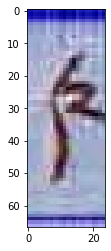

('仁', tensor([0.6706]))	('食', tensor([0.6878]))	('膠', tensor([0.1840]))

Loading image  1621936981_img.jpg


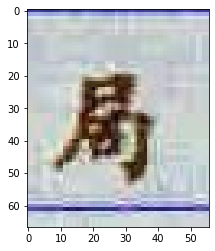

('局', tensor([0.9955]))	('園', tensor([0.4759]))	('盈', tensor([0.6768]))

Loading image  1621936985_img.jpg


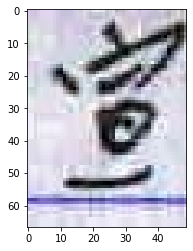

('宣', tensor([0.9894]))	('宣', tensor([0.8578]))	('宣', tensor([0.9999]))

Loading image  1621936987_img.jpg


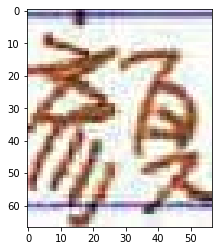

('顏', tensor([0.9691]))	('顏', tensor([0.6986]))	('顏', tensor([0.8308]))

Loading image  1621936989_img.jpg


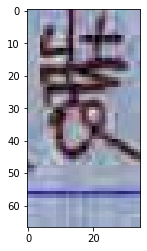

('裝', tensor([0.9746]))	('餐', tensor([0.5263]))	('裝', tensor([0.7180]))

Loading image  1621936990_img.jpg


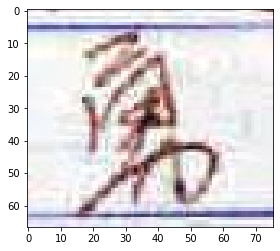

('寓', tensor([0.9554]))	('憲', tensor([0.9823]))	('惠', tensor([0.6260]))

Loading image  1621936992_img.jpg


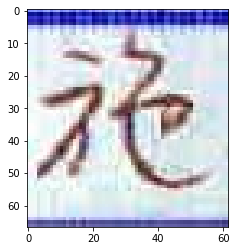

('施', tensor([0.9830]))	('施', tensor([0.5244]))	('施', tensor([0.9993]))

Loading image  1621936994_img.jpg


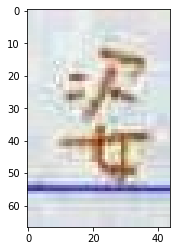

('姿', tensor([0.9897]))	('姿', tensor([0.9132]))	('丞', tensor([0.5672]))

Loading image  1621936997_img.jpg


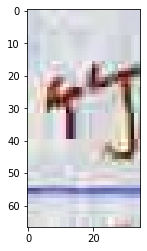

('竹', tensor([0.9990]))	('竹', tensor([0.8565]))	('竹', tensor([0.8908]))

Loading image  1621937001_img.jpg


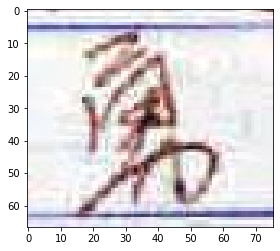

('寓', tensor([0.9554]))	('憲', tensor([0.9823]))	('惠', tensor([0.6260]))

Loading image  1621937006_img.jpg


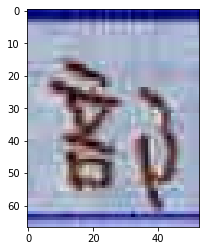

('部', tensor([0.9918]))	('孟', tensor([0.3752]))	('孟', tensor([0.3309]))

Loading image  1621937010_img.jpg


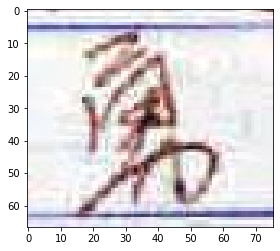

('寓', tensor([0.9554]))	('憲', tensor([0.9823]))	('惠', tensor([0.6260]))

Loading image  1621937013_img.jpg


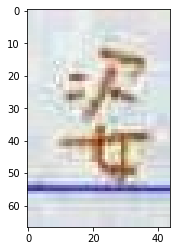

('姿', tensor([0.9897]))	('姿', tensor([0.9132]))	('丞', tensor([0.5672]))

Loading image  1621937015_img.jpg


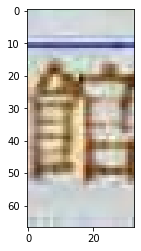

('館', tensor([0.9929]))	('館', tensor([0.9407]))	('館', tensor([0.4556]))

Loading image  1621937017_img.jpg


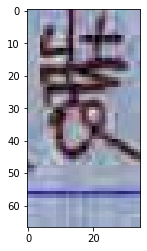

('裝', tensor([0.9746]))	('餐', tensor([0.5263]))	('裝', tensor([0.7180]))

Loading image  1621937018_img.jpg


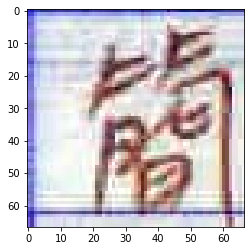

('簡', tensor([1.0000]))	('簡', tensor([0.9510]))	('簡', tensor([0.9999]))

Loading image  1621937019_img.jpg


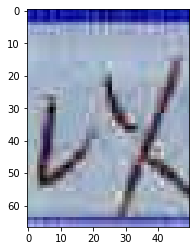

('水', tensor([0.4588]))	('水', tensor([0.2579]))	('北', tensor([0.3594]))

Loading image  1621937021_img.jpg


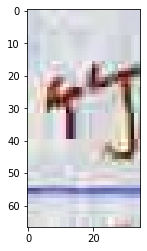

('竹', tensor([0.9990]))	('竹', tensor([0.8565]))	('竹', tensor([0.8908]))

Loading image  1621937022_img.jpg


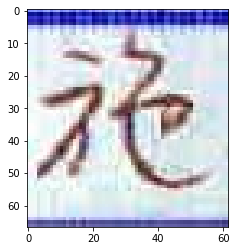

('施', tensor([0.9830]))	('施', tensor([0.5244]))	('施', tensor([0.9993]))

Loading image  1621937023_img.jpg


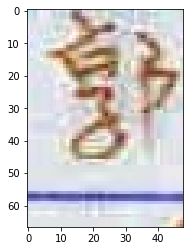

('亨', tensor([0.5607]))	('郭', tensor([0.5547]))	('郭', tensor([0.5751]))

Loading image  1621937025_img.jpg


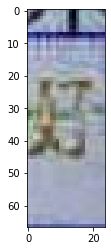

('好', tensor([0.9255]))	('密', tensor([0.2772]))	('精', tensor([0.2001]))

Loading image  1621937026_img.jpg


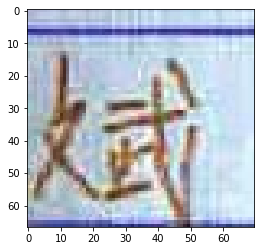

('織', tensor([0.7101]))	('經', tensor([0.2540]))	('斌', tensor([0.5042]))

Loading image  1621937027_img.jpg


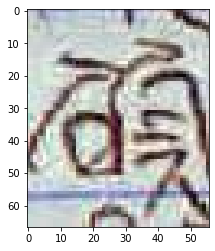

('碩', tensor([0.9477]))	('碩', tensor([0.6331]))	('碩', tensor([0.8704]))

Loading image  1621937028_img.jpg


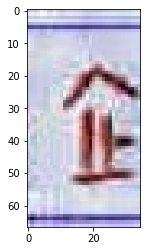

('企', tensor([0.9036]))	('堅', tensor([0.5005]))	('企', tensor([0.8117]))

Loading image  1621937029_img.jpg


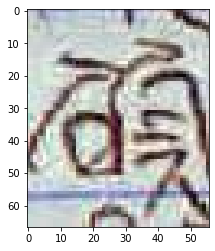

('碩', tensor([0.9477]))	('碩', tensor([0.6331]))	('碩', tensor([0.8704]))

Loading image  1621937031_img.jpg


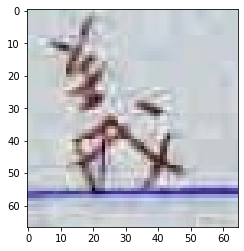

('義', tensor([0.7438]))	('菱', tensor([0.3394]))	('義', tensor([0.5175]))

Loading image  1621937032_img.jpg


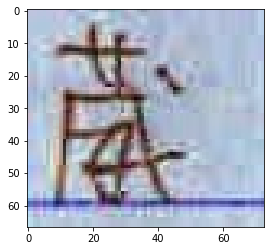

('葳', tensor([0.8256]))	('盛', tensor([0.9110]))	('葳', tensor([0.9996]))

Loading image  1621937033_img.jpg


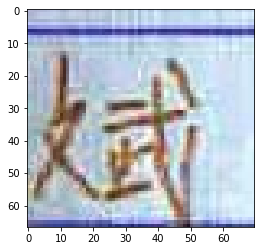

('織', tensor([0.7101]))	('經', tensor([0.2540]))	('斌', tensor([0.5042]))

Loading image  1621937035_img.jpg


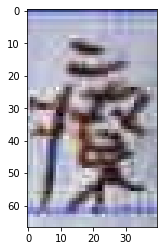

('療', tensor([0.9832]))	('療', tensor([0.9745]))	('療', tensor([0.9948]))

Loading image  1621937036_img.jpg


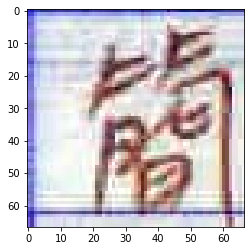

('簡', tensor([1.0000]))	('簡', tensor([0.9510]))	('簡', tensor([0.9999]))

Loading image  1621937038_img.jpg


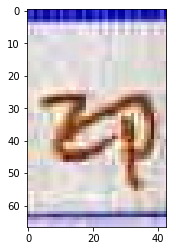

('印', tensor([0.8850]))	('門', tensor([0.1764]))	('包', tensor([0.5974]))

Loading image  1621937040_img.jpg


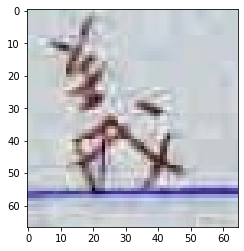

('義', tensor([0.7438]))	('菱', tensor([0.3394]))	('義', tensor([0.5175]))

Loading image  1621937041_img.jpg


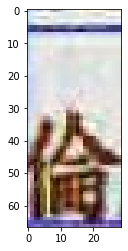

('倫', tensor([0.7296]))	('僑', tensor([0.2964]))	('益', tensor([0.8780]))

Loading image  1621937043_img.jpg


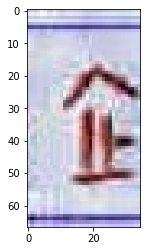

('企', tensor([0.9036]))	('堅', tensor([0.5005]))	('企', tensor([0.8117]))

Loading image  1621937045_img.jpg


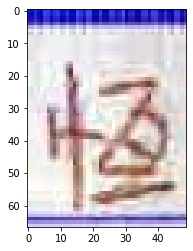

('恆', tensor([0.9996]))	('區', tensor([0.5608]))	('恆', tensor([0.9998]))

Loading image  1621937048_img.jpg


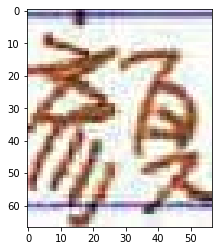

('顏', tensor([0.9691]))	('顏', tensor([0.6986]))	('顏', tensor([0.8308]))

Loading image  1621937049_img.jpg


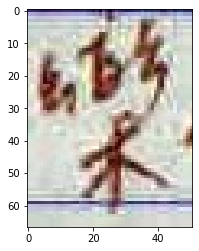

('樂', tensor([0.9965]))	('樂', tensor([0.8811]))	('樂', tensor([0.9778]))

Loading image  1621937050_img.jpg


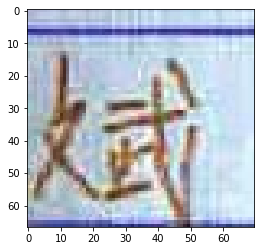

('織', tensor([0.7101]))	('經', tensor([0.2540]))	('斌', tensor([0.5042]))

Loading image  1621937052_img.jpg


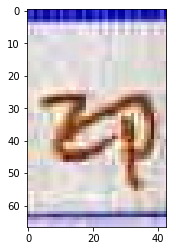

('印', tensor([0.8850]))	('門', tensor([0.1764]))	('包', tensor([0.5974]))

Loading image  1621937053_img.jpg


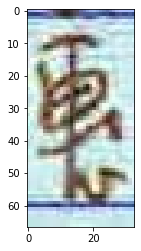

('雲', tensor([0.5261]))	('憲', tensor([0.7328]))	('惠', tensor([0.8755]))

Loading image  1621937054_img.jpg


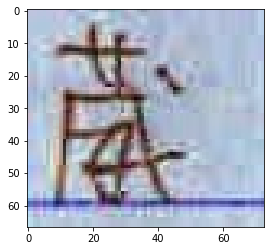

('葳', tensor([0.8256]))	('盛', tensor([0.9110]))	('葳', tensor([0.9996]))

Loading image  1621937056_img.jpg


In [ ]:
def predict_img(img, model, preprocess_func, mapping):
    img = preprocess_func(img).to(device)
    img = torch.unsqueeze(img, dim=0)
    with torch.no_grad():
        out = model(img)
        out = softmax(out)
        val, pred = torch.max(out, 1)
        pred = mapping[int(pred.item())]
    return pred, val


path = './image'
img_paths = sorted(glob(os.path.join(path, '*.jpg')))

for img_path in img_paths:
    if int(img_path.split('/')[-1].split('_')[0]) < 1621936977: continue
    img = cv2.imread(img_path, 1)
    assert(img is not None)
    print('Loading image ', img_path.split('/')[-1])
    pred1 = predict_img(img, model1, preprocess_img, label2word)
    pred2 = predict_img(img, model2, preprocess_img, label2word)
    pred3 = predict_img(img, model3, preprocess3_img, label2word2)
    plt.imshow(img)
    plt.show()
    print('{}\t{}\t{}'.format(pred1, pred2, pred3))
    input()